# Projeto Final

## Parte 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('./misp.csv', delimiter=',', nrows = None)
df.dataframeName = 'misp.csv'

df_selected = df[['category', 'type', 'value']].copy()

In [3]:
df_shuffle = shuffle(df_selected, random_state=None).reset_index(drop=True)

int_80 = int(df_shuffle.shape[0] * 0.8)

df_80 = df_shuffle.loc[:int_80, :]
df_20 = df_shuffle.loc[int_80:, :]

## Parte 2

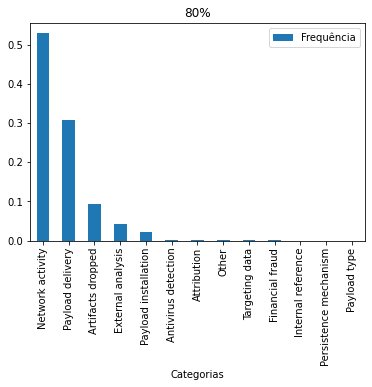

In [4]:
plot_df_80 = pd.DataFrame({
    'Categorias': df_80['category'].unique(),
    'Frequência': df_80['category'].value_counts(normalize=True)
})
plot_df_80.plot(x ='Categorias', y='Frequência', kind = 'bar', title='80%')
plt.show()

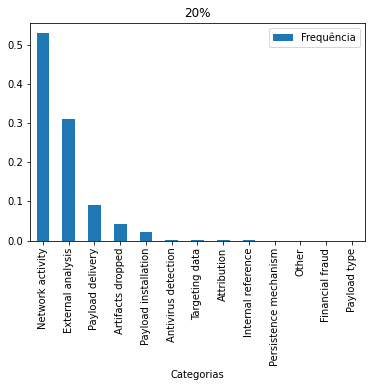

In [5]:
plot_df_20 = pd.DataFrame({
    'Categorias': df_20['category'].unique(),
    'Frequência': df_20['category'].value_counts(normalize=True)
})
plot_df_20.plot(x ='Categorias', y='Frequência', kind = 'bar', title='20%')
plt.show()

## Parte 3

In [38]:
from gensim.models.word2vec import Word2Vec
def word2Vec(lista, size):
	data_part1 = lista[:size]
	model = Word2Vec([lista], min_count = 0)
	return model

def makeModel(lista, model):
	ret = []
	for elem in lista:
		ret_lista = model.wv[elem].tolist()
		ret.append(ret_lista)
	return ret

nRow, nCol = df_80.shape
category = list(df_80['category'])
model = word2Vec(category, nRow)

cat_model = makeModel(category, model)